In [17]:
import pandas as pd

data_frame = pd.read_csv('./assets/exams.csv')

changeToEnglish = {
	'diagnostico': 'diagnosis'
}

data_frame.rename(columns=changeToEnglish, inplace=True)

results = data_frame[['id', 'diagnosis']]
diagnosis = results.diagnosis

# describers.isnull().sum() executing this will output that column exame_33 has several null values, for now Im removing then
describers = data_frame.drop(columns=['id', 'diagnosis', 'exame_33'])

In [18]:
from sklearn.model_selection import train_test_split

SEED = 1234

describers_train, describers_test, diagnosis_train, diagnosis_test = train_test_split(
	describers,
	diagnosis,
	test_size=0.25,
	stratify=diagnosis,
	random_state=SEED
	)

print("We ll train with %d elements e test it with %d elements" % (len(describers_train), len(describers_test)))

We ll train with 426 elements e test it with 143 elements


In [19]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(describers_train, diagnosis_train)

result = classifier.score(describers_test, diagnosis_test)

print("Classification Result %.2f%%" %(result * 100))

print("It seems good, but lets try add a baseline with a dummyClassifier")

Classification Result 97.20%
It seems good, but lets try add a baseline with a dummyClassifier


In [20]:
from sklearn.dummy import DummyClassifier

SEED = 121314

dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(describers_train, diagnosis_train)

result = dummy_classifier.score(describers_test, diagnosis_test)


print('Dummy Classification Result %.2f%%' %(result * 100))

print('Yeah, it looks like the first one is okay')

Dummy Classification Result 62.94%
Yeah, it looks like the first one is okay


In [21]:
data_plot =  pd.concat([diagnosis, describers.iloc[:, 0:10]], axis = 1)

data_plot = pd.melt(data_plot, id_vars='diagnosis', var_name='exams', value_name='values')

data_plot.head()

,diagnosis,exams,values
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


<AxesSubplot:xlabel='exams', ylabel='values'>

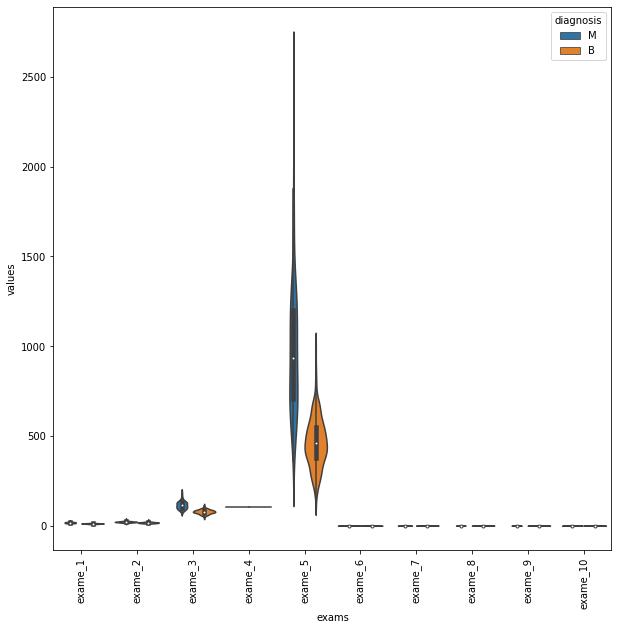

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.xticks(rotation = 90)

sns.violinplot(x = 'exams', y = 'values',
	       hue="diagnosis", data = data_plot)

In [23]:
print('I have no idea, 0 insights about this graph. I ll try again tomorrow tho')

I have no idea, 0 insights about this graph. I ll try again tomorrow tho
